In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [7]:
from sklearn import  linear_model, datasets
from numpy import *
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import os
from sklearn.utils.multiclass import unique_labels


Check working directory, probably in knearest folder. Change to cwd to src to acces the data easily

In [2]:
os.getcwd()

'/home/ec2-user/SageMaker/src/logit'

Load the data into numpy arrays

In [3]:
%%time
img = np.genfromtxt('../data/training-images.csv', delimiter=',')
test = np.genfromtxt('../data/test-images.csv', delimiter=',')

labels = np.genfromtxt('../data/training-labels.csv', delimiter=',')
test_labels = np.genfromtxt('../data/test-labels.csv', delimiter=',')

CPU times: user 52 s, sys: 2 s, total: 54 s
Wall time: 53.9 s


Create classifier instance, and train + predict the test data

In [10]:
%%time

print(img)

# log = linear_model.LogisticRegressionCV(Cs=logspace(-4,4,20), cv=5, n_jobs=-1, multi_class='multinomial', solver='lbfgs', verbose=2)
# log.fit(img,labels)
# predicted = log.predict(test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
CPU times: user 1.04 ms, sys: 19 µs, total: 1.06 ms
Wall time: 859 µs


Create confusion matrix plotter @scilearndocs

In [15]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Normalized confusion matrix
[[9.62376238e-01 0.00000000e+00 1.28712871e-02 0.00000000e+00
  1.98019802e-03 3.96039604e-03 5.94059406e-03 0.00000000e+00
  5.94059406e-03 6.93069307e-03]
 [8.33333333e-04 9.43333333e-01 1.00000000e-02 2.50000000e-03
  9.16666667e-03 0.00000000e+00 3.33333333e-03 2.25000000e-02
  3.33333333e-03 5.00000000e-03]
 [1.00000000e-03 2.00000000e-03 9.82000000e-01 3.00000000e-03
  0.00000000e+00 0.00000000e+00 0.00000000e+00 4.00000000e-03
  5.00000000e-03 3.00000000e-03]
 [0.00000000e+00 0.00000000e+00 1.98412698e-03 9.68253968e-01
  0.00000000e+00 1.19047619e-02 0.00000000e+00 0.00000000e+00
  1.09126984e-02 6.94444444e-03]
 [0.00000000e+00 0.00000000e+00 1.03626943e-03 1.03626943e-03
  9.74093264e-01 1.03626943e-03 3.10880829e-03 2.07253886e-03
  7.25388601e-03 1.03626943e-02]
 [2.24971879e-03 0.00000000e+00 0.00000000e+00 1.12485939e-02
  0.00000000e+00 9.70753656e-01 2.24971879e-03 0.00000000e+00
  1.01237345e-02 3.37457818e-03]
 [3.10880829e-03 1.03626943e-0

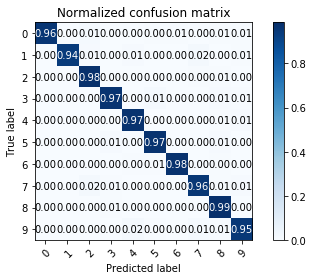

In [16]:
#plot results
# Plot normalized confusion matrix
plot_confusion_matrix(predicted, test_labels, classes=np.array([0,1,2,3,4,5,6,7,8,9]), normalize=True,
                      title='Normalized confusion matrix')
plt.show()

In [17]:
print("The accuracy of the model is {}".format(accuracy_score(predicted,test_labels)))

The accuracy of the model is 0.9665
